# Investigating the dependence of the acceleration of calculating the integral on the number of processes

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

The measurements are provided by running `compute-integral` executable on the MPI cluster

In [45]:
results_path = "local.csv"

data = pd.read_csv(results_path)
print(data)

        parts  proc     accel
0        1000     1  0.425938
1        1000     2  0.756244
2        1000     3  0.979473
3        1000     4  0.533122
4     1000000     1  1.020240
5     1000000     2  2.076720
6     1000000     3  3.073970
7     1000000     4  2.663250
8   100000000     1  1.031320
9   100000000     2  2.019990
10  100000000     3  3.024870
11  100000000     4  4.233780


Text(0.5, 0, 'number of MPI processes')

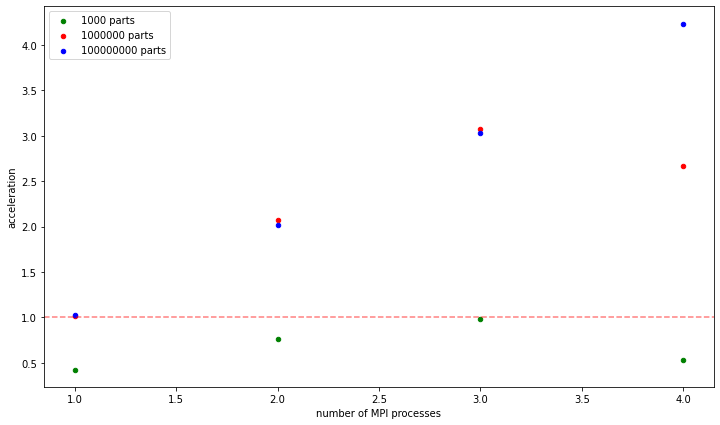

In [61]:
def plot_slice(data, n_parts, ax, color):
    data_slice = data.loc[data['parts'] == n_parts]
    data_slice.plot.scatter(x = 'proc', y = 'accel', color=color, label="{} parts".format(n_parts), ax=ax)
     
fig, ax = plt.subplots(figsize=(12, 7))

plot_slice(data, 1000, ax, 'g')
plot_slice(data, 1000000, ax, 'r')
plot_slice(data, 100000000, ax, 'b')

plt.axhline(y=1, color='r', alpha=0.5, linestyle='--')

ax.set_ylabel('acceleration')
ax.set_xlabel('number of MPI processes')

__Conclusion:__ As we can see, when number of parts in partition is small enough, the acceleration is below 1, so using MPI on small computational tasks is not reasonable. However, when number of parts is more than $1000000$, using MPI gives an acceleration multiple of the number of processes.

In [37]:
fig.savefig("report.png")